In [1]:
# pip install spacy
# pip install nltk

### Importo las librerías necesarias

In [2]:
import os
import csv
import spacy
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

### Funciones a aplicar

In [3]:
def obtener_transcripcion(ruta):
    '''
    Dada una ruta, obtiene el texto del csv con el formato adecuado
    '''
    with open(ruta, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter='.')
        fila = 0
        for row in reader:
            if fila != 0:
                transcripcion = '\n'.join(row)        
            fila += 1
    return transcripcion

def custom_tokenizer(text):
    """
    Dado un texto, obtengo los tokens que me interesan para mi análisis
    """
    tokens_complete = nlp(text)
    tokens = [token.text.lower() for token in tokens_complete if token.is_alpha and not token.like_num 
             and  (token.pos_ == 'NOUN' or token.pos_ == 'ADJ')
             and not token.dep_.startswith('nsubj') and token.text.lower() not in spanish_stopwords 
             and token.text.lower() not in palabras_a_excluir ]
    return tokens

### Obtengo una lista con todas las transcripciones

In [4]:
carpeta = './corpus'

transcripciones = []

archivos = os.listdir(carpeta)

for archivo in archivos:
    ruta = 'corpus/' + archivo
    transcripciones.append(obtener_transcripcion(ruta)) 

### Vectorizo las palabras de los textos

In [5]:
nlp = spacy.load('es_core_news_sm')

spanish_stopwords = list(stopwords.words('spanish'))

#Creo una lista de palabras que no me interesa considerar
palabras_a_excluir = ["hola", "muchas",  "gracias", "favor", "saludos", "chau", "nombre",
                       "pedido", "producto", "número", "día", "días", "tardes", 
                       "bueno", "perfecto", "buenas", "buenos", "claro"]

vectorizer = TfidfVectorizer(max_features=5, tokenizer=custom_tokenizer)
tfidf_matrix = vectorizer.fit_transform(transcripciones)

c:\Mati\Pruebas\entorno_mati\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Clusterizo mediante el método de K-means

In [6]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

labels = kmeans.labels_

# Calculo el Silhouette Score para evaluar al modelo
silhouette_avg = silhouette_score(tfidf_matrix, labels)
print(f"Silhouette Score: {silhouette_avg}")

c:\Mati\Pruebas\entorno_mati\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.6457704106263978


### Grafico la distribución de los clusters

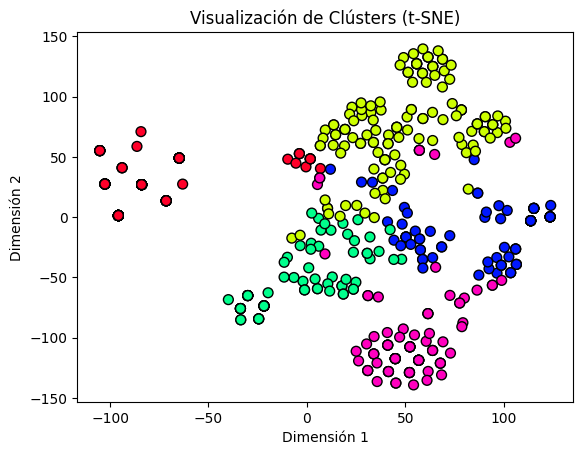

In [7]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='gist_rainbow', edgecolor='k', s=50)
plt.title('Visualización de Clústers (t-SNE)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()